In [ ]:
  from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/NLP_GAZA_Research/Data/Names_vs_Sentiments/F_Done_cleaned_name_sentiment_analysis.csv'

# Load while skipping problematic lines
df = pd.read_csv(file_path, low_memory=False, on_bad_lines='skip', encoding='ISO-8859-1')
df.head()


,name,context,position,sentiment,article_date,headline,url,year_month,sentiment_label
0,Gen Qassem Suleimani,the rioters at the embassy on Tuesday held alo...,Words 81-113,3,2011-12-01 10:30:08,Iran: Quds Force leader is developing a cult s...,https://www.theguardian.com/world/2011/dec/01/...,2011-12-01 00:00:00,Neutral
1,Wiliam Hague,claims that a known Quds commander was in the ...,Words 107-139,1,2011-12-01 10:30:08,Iran: Quds Force leader is developing a cult s...,https://www.theguardian.com/world/2011/dec/01/...,2011-12-01 00:00:00,Very Negative
2,Ali Khamanei,"Basij militia"", but diplomats note that accord...",Words 141-173,3,2011-12-01 10:30:08,Iran: Quds Force leader is developing a cult s...,https://www.theguardian.com/world/2011/dec/01/...,2011-12-01 00:00:00,Neutral
3,Meir Javedanfar,"Supreme Leader, Ali Khamenei, the Basij serve ...",Words 154-186,5,2011-12-01 10:30:08,Iran: Quds Force leader is developing a cult s...,https://www.theguardian.com/world/2011/dec/01/...,2011-12-01 00:00:00,Very Positive
4,Khamenei,"Israeli-Iranian analyst, said: ""The Basij fall...",Words 172-203,1,2011-12-01 10:30:08,Iran: Quds Force leader is developing a cult s...,https://www.theguardian.com/world/2011/dec/01/...,2011-12-01 00:00:00,Very Negative


In [ ]:
# Convert article_date to datetime
df['article_date'] = pd.to_datetime(df['article_date'], errors='coerce')

# Extract useful time features
df['year'] = df['article_date'].dt.year
df['month'] = df['article_date'].dt.month
df['day'] = df['article_date'].dt.day
df['year_month'] = df['article_date'].dt.to_period('M')


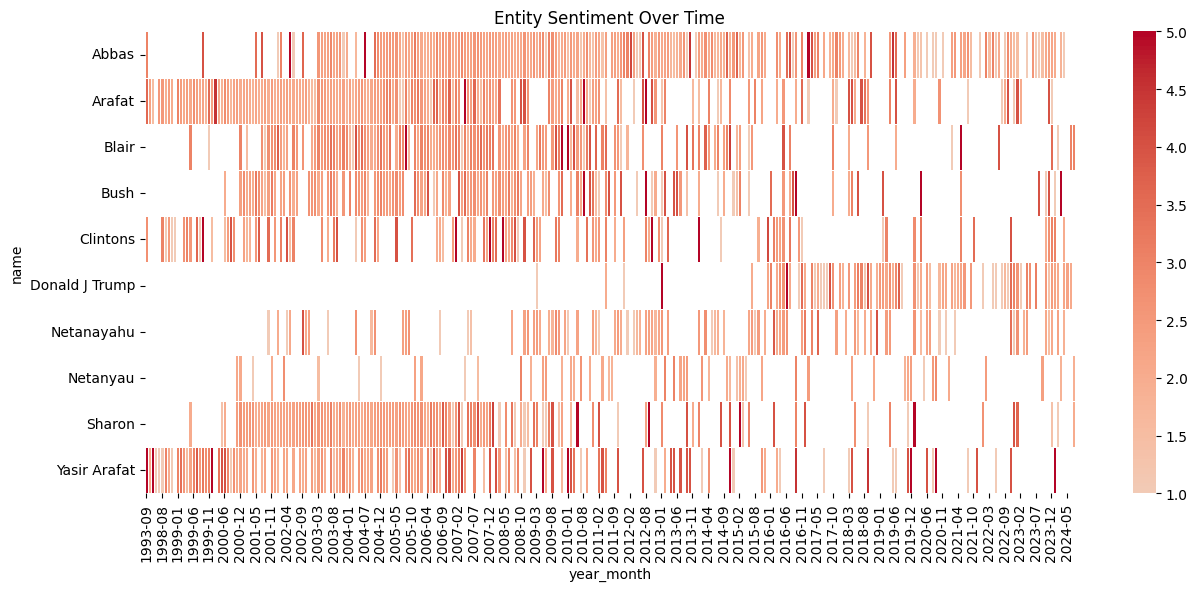

In [ ]:
pivot = df[df['name'].isin(top_entities)].pivot_table(index='name', columns='year_month', values='sentiment', aggfunc='mean')

plt.figure(figsize=(15, 6))
sns.heatmap(pivot, cmap='coolwarm', center=0, linewidths=0.5, annot=False)
plt.title('Entity Sentiment Over Time')
plt.show()


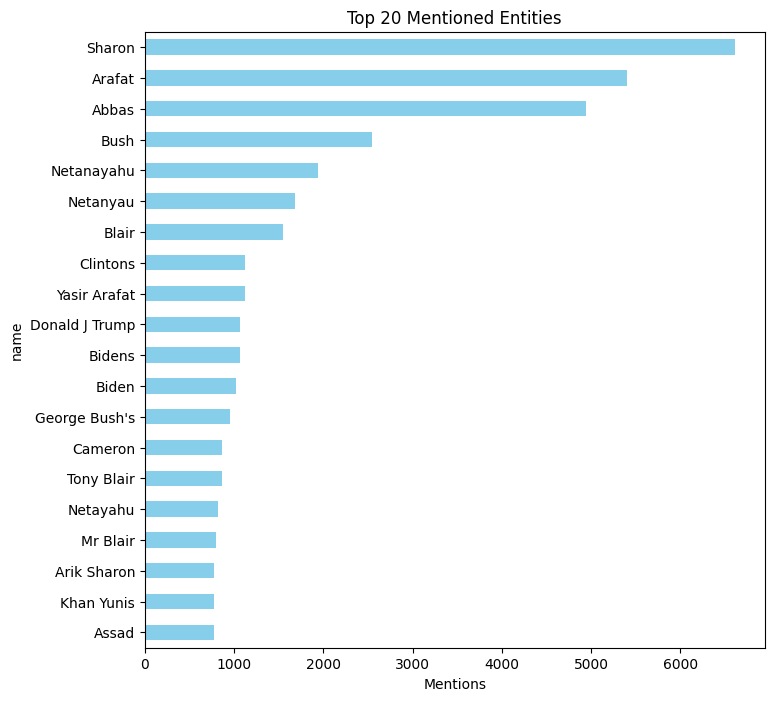

In [ ]:
df['name'].value_counts().head(20).plot(kind='barh', figsize=(8,8), color='skyblue')
plt.title('Top 20 Mentioned Entities')
plt.gca().invert_yaxis()
plt.xlabel('Mentions')
plt.show()


<ipython-input-33-b47bec6d5db2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=df['sentiment_label'].value_counts().index, palette='coolwarm')


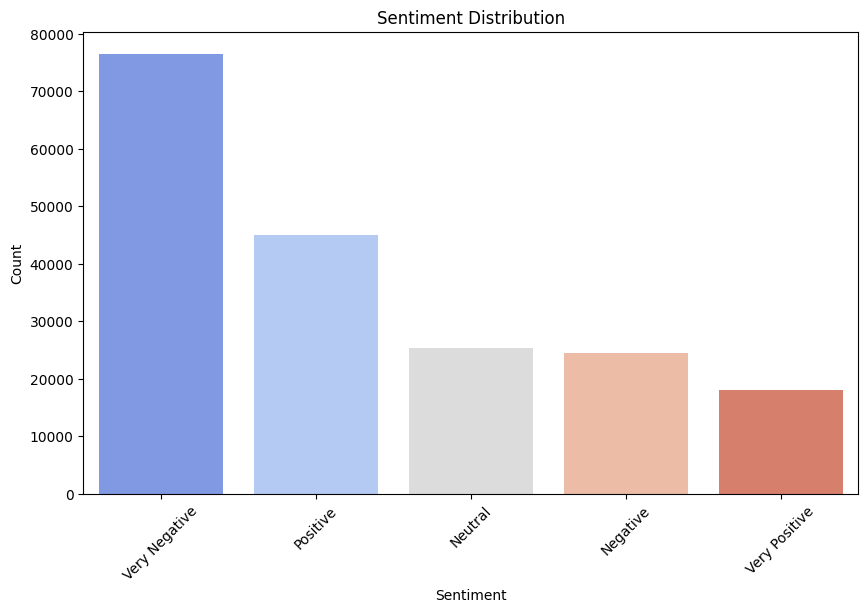

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sentiment_label', order=df['sentiment_label'].value_counts().index, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-55-bd432fb47fa9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_names.values, y=top_names.index, palette='viridis')


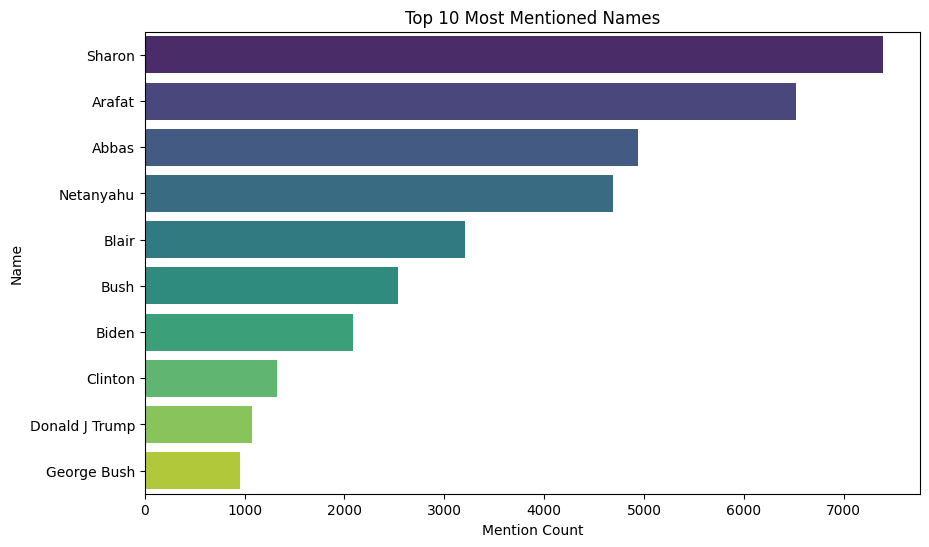

In [ ]:
# Define common aliases or misspellings to unify
name_mapping = {
    'Netanyau': 'Netanyahu',
    'Binyamin Netanyahu': 'Netanyahu',
    'Benjamin Netanyahu': 'Netanyahu',
    'Benyamin Netanyahu': 'Netanyahu',
    'Netanayahu': 'Netanyahu',
    'Netayahu': 'Netanyahu',
    'Mr Blair': 'Blair',
    'Tony Blair': 'Blair',
    'Yasir Arafat' : 'Arafat',
    'Bidens' : 'Biden',
    'Clintons' : 'Clinton',
    'Arik Sharon' : 'Sharon',
    "George Bush's" : "George Bush"
    # Add more if needed
}
# Replace known variants with the standardized name
df['name'] = df['name'].replace(name_mapping)
top_names = df['name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_names.values, y=top_names.index, palette='viridis')
plt.title('Top 10 Most Mentioned Names')
plt.xlabel('Mention Count')
plt.ylabel('Name')
plt.show()


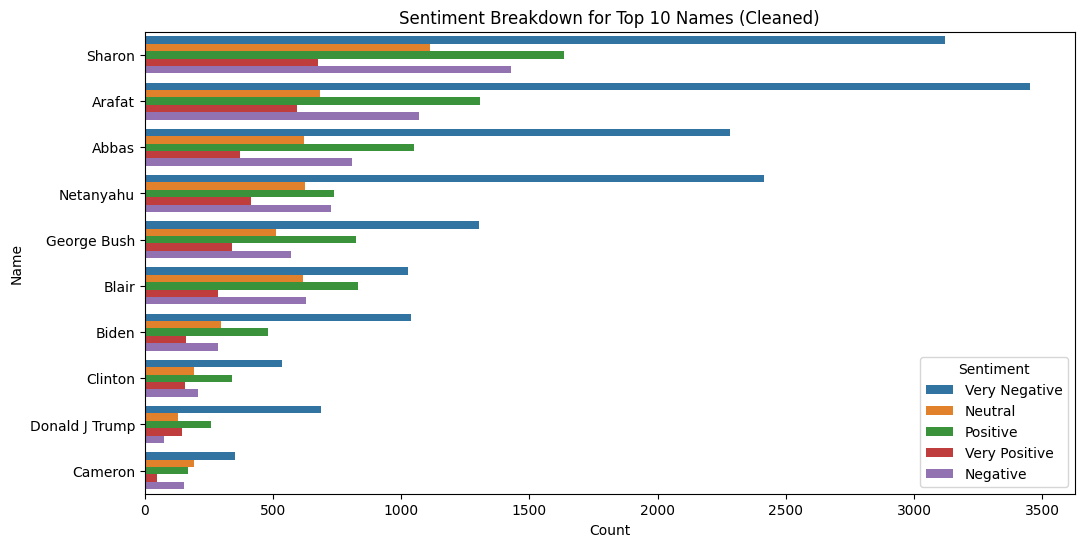


Quantitative Sentiment Summary for Top 10 Names:

sentiment_label  Negative  Neutral  Positive  Very Negative  Very Positive
name                                                                      
Sharon               1430     1113      1636           3121            677
Arafat               1069      685      1307           3454            595
Abbas                 809      620      1051           2284            373
Netanyahu             727      623       736           2416            416
George Bush           571      511       822           1302            340
Blair                 627      617       832           1028            287
Biden                 287      298       479           1037            162
Clinton               209      192       342            534            155
Donald J Trump         74      129       259            687            146
Cameron               154      192       168            353             49


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define common aliases or misspellings to unify
name_mapping = {
    'Netanyau': 'Netanyahu',
    'Binyamin Netanyahu': 'Netanyahu',
    'Benjamin Netanyahu': 'Netanyahu',
    'Benyamin Netanyahu': 'Netanyahu',
    'Netanayahu': 'Netanyahu',
    'Netayahu': 'Netanyahu',
    'Mr Blair': 'Blair',
    'Tony Blair': 'Blair',
    'Yasir Arafat' : 'Arafat',
    'Bidens' : 'Biden',
    'Clintons' : 'Clinton',
    'Arik Sharon' : 'Sharon',
    "George Bush's" : "George Bush",
    "Bush" : "George Bush"
}

# Replace known variants with the standardized name
df['name'] = df['name'].replace(name_mapping)

# Get top 10 after normalization
top_entities = df['name'].value_counts().head(10).index.tolist()
top_df = df[df['name'].isin(top_entities)]

# ---------- Plot ----------
plt.figure(figsize=(12, 6))
sns.countplot(data=top_df, y='name', hue='sentiment_label', order=top_entities)
plt.title('Sentiment Breakdown for Top 10 Names (Cleaned)')
plt.xlabel('Count')
plt.ylabel('Name')
plt.legend(title='Sentiment')
plt.show()

# ---------- Quantitative Summary ----------
print("\nQuantitative Sentiment Summary for Top 10 Names:\n")
summary = top_df.groupby(['name', 'sentiment_label']).size().unstack(fill_value=0)
summary = summary.loc[top_entities]  # Ensure correct order
print(summary)
